In [1]:
import os
import pandas as pd
import glob

## Importa os arquivos para um dataframe

In [2]:
folder_threated = "resources/bases/tratada/"

In [3]:
all_files = glob.glob(folder_threated + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep="|", names=["position", "artist", "music"])
    df["year"] = filename.split("/")[-1].replace("_ok.txt", "")
    li.append(df)

df = pd.concat(li, ignore_index=True, sort=True)

list_total = len(li)

## Tratando alguns casos de exceção

In [4]:
df.loc[(df.music == 'HELP!'),'music']='HELP'
df.loc[(df.music == 'HEY, JUDE'),'music']='HEY JUDE'

In [5]:
df.head()

,artist,music,position,year
0,QUEEN,BOHEMIAN RHAPSODY,1,2007
1,LED ZEPPELIN,STAIRWAY TO HEAVEN,2,2007
2,PINK FLOYD,ANOTHER BRICK IN THE WALL,3,2007
3,DEEP PURPLE,SMOKE ON THE WATER,4,2007
4,BEATLES,HELP,5,2007


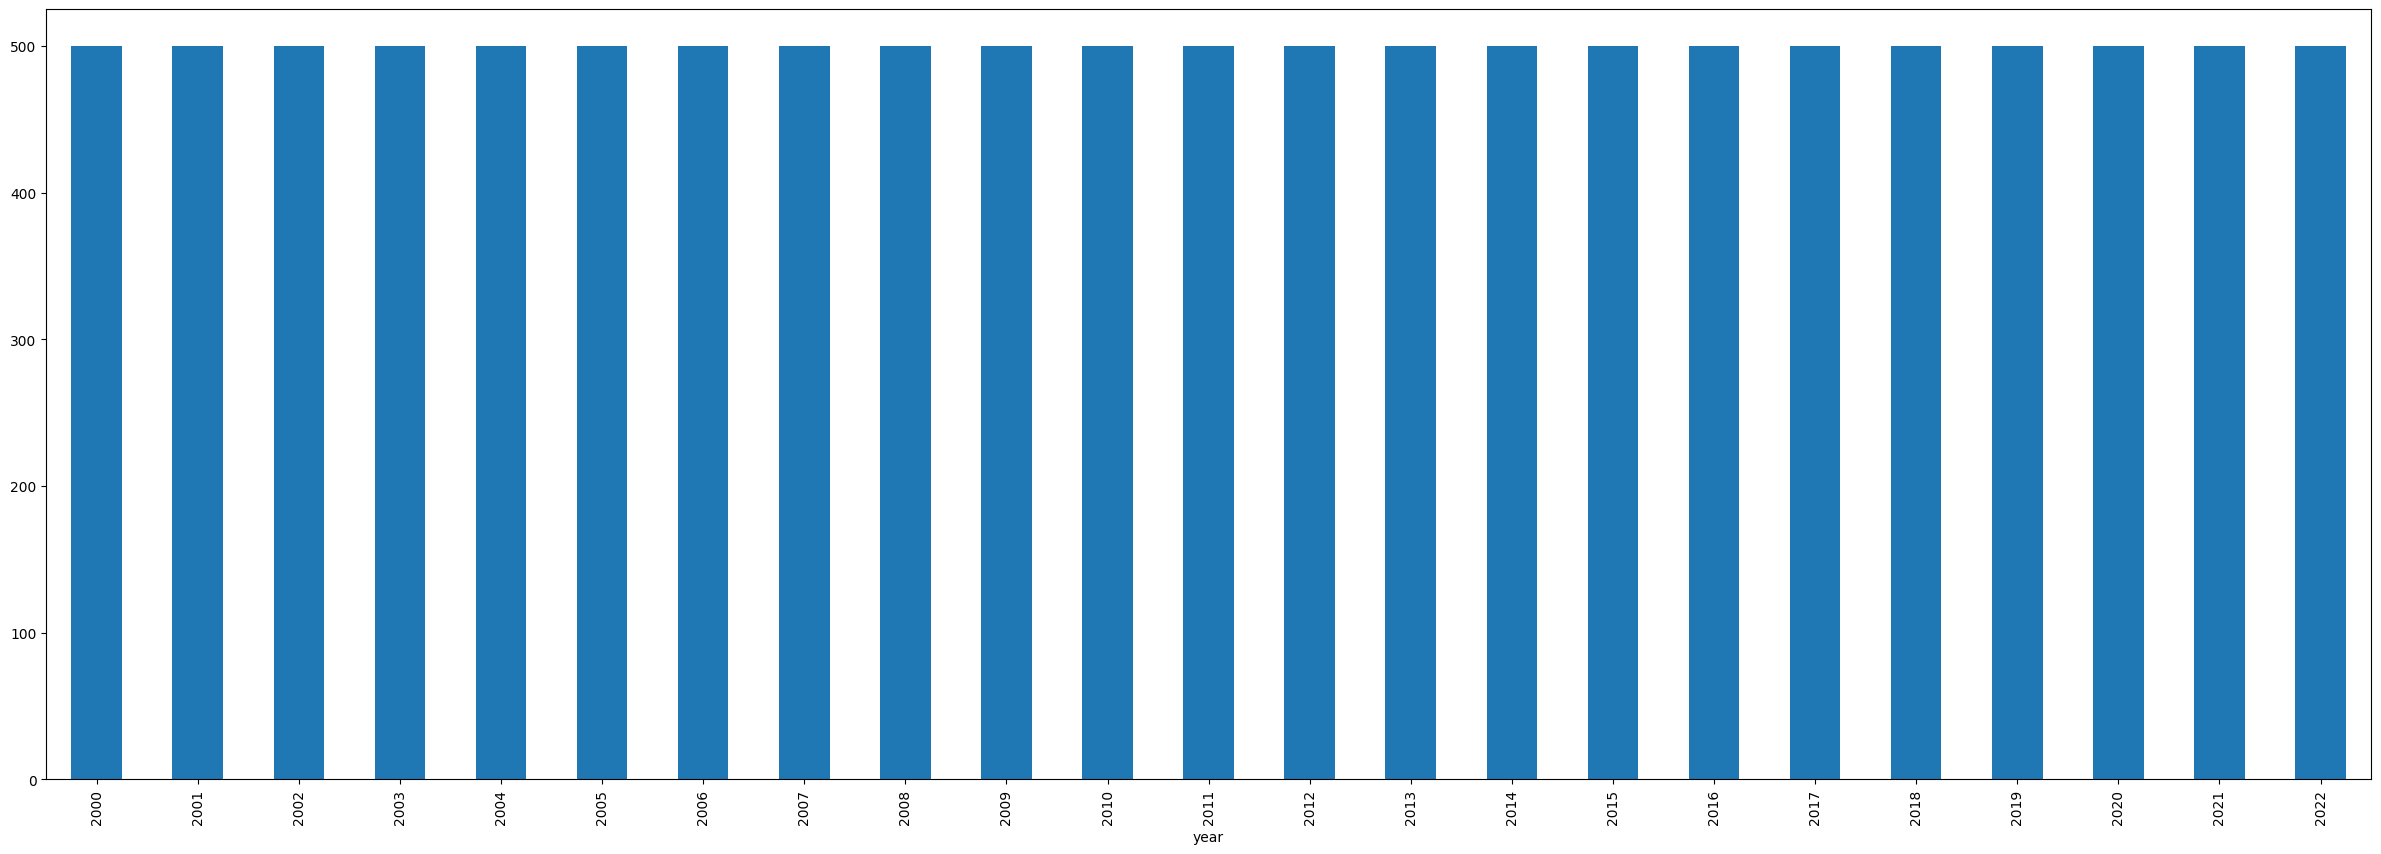

In [6]:
groups = df.groupby(['year']).size()
groups.plot.bar(figsize=(30,10));

In [7]:
print(f"Hoje temos {list_total} arquivos para trabalhar")

Hoje temos 23 arquivos para trabalhar


## Get TOP 10 artistas da lista

Somando todas as listas

In [8]:
df['artist'].value_counts()[:10]

BEATLES         398
LED ZEPPELIN    291
QUEEN           281
AEROSMITH       224
PINK FLOYD      207
RUSH            199
AC/DC           197
KISS            183
VAN HALEN       183
DEEP PURPLE     180
Name: artist, dtype: int64

## **Get TOP 10 músicas da lista**

Não resolve pegar só a música porque tem bandas com músicas com mesmo nome

In [9]:
df['music'].value_counts()[:10]

ONE                     33
CHANGES                 32
SOMEBODY TO LOVE        30
REVOLUTION              30
DREAMS                  29
LIKE A ROLLING STONE    28
TIME                    28
DREAM ON                28
JAILBREAK               26
PARANOID                23
Name: music, dtype: int64

In [10]:
df_artists_music = df.groupby(['artist', 'music']).size().sort_values(ascending=False).reset_index(name='total')

## Quais/quantas músicas estão presentes em todas as listas ?

In [11]:
df_artists_music.head(10)

,artist,music,total
0,LED ZEPPELIN,STAIRWAY TO HEAVEN,23
1,LED ZEPPELIN,BLACK DOG,23
2,RUSH,TOM SAWYER,23
3,DIRE STRAITS,MONEY FOR NOTHING,23
4,DEEP PURPLE,SMOKE ON THE WATER,23
5,JETHRO TULL,AQUALUNG,22
6,PINK FLOYD,TIME,22
7,STEPPENWOLF,BORN TO BE WILD,22
8,GENESIS,MAMA,22
9,BLACK SABBATH,PARANOID,22


## Quais/quantas músicas que estão presentes em somente 1 lista ?

In [12]:
df_artists_music[df_artists_music["total"]==1].head(10)

,artist,music,total
1702,THE SMITHS,BIG MOUTH STRIKES AGAIN,1
1703,VAN HALEN,I’LL WAIT,1
1704,THE SMASHING PUMPKINS,1979,1
1705,VAN HALEN,POUNDCAKE,1
1706,VAN HALEN,RUNNING WITH THE DEVIL,1
1707,RUSH,CARAVAN,1
1708,RUSH,BIG MONEY,1
1709,ROY ORBISON,CRYING,1
1710,THE POLICE,DE DO DO DO DE DA DA DA,1
1711,ROY ORBISON,OH! PRETTY WOMAN,1


In [13]:
df_artists_music.groupby('total').size().sort_values(ascending=False).reset_index(name='sum')

,total,sum
0,1,1540
1,2,489
2,3,236
3,4,204
4,5,156
5,6,118
6,7,95
7,8,53
8,9,48
9,10,42


## Checar músicas com nomes iguais na base

In [14]:
df_artists_music[df_artists_music.duplicated(['music'])==True]

,artist,music,total
102,METALLICA,ONE,16
277,FLEETWOOD MAC,DREAMS,10
283,JEFFERSON AIRPLANE,SOMEBODY TO LOVE,10
291,BAUHAUS,ZIGGY STARDUST,10
301,THE CULT,REVOLUTION,10
...,...,...,...
3219,JOHN LENNON,DO YOU WANNA DANCE,1
3223,JOHN COUGAR MELLENCAMP,WILD NIGHT,1
3226,JOHN COUGAR,I NEED A LOVER,1
3238,JOAN JETT AND THE BLACHEARTS,I LOVE ROCK N ROLL,1


In [30]:
df_artists_music[df_artists_music['music']=='LA BAMBA']

,artist,music,total
446,RITCHIE VALENS,LA BAMBA,6
2828,LOS LOBOS,LA BAMBA,1


## **Rankear as TOP das Tops**

Encontrar as músicas que melhores rankearam nas listas

Critério:
- score = 500 - posição. 

    Exemplo: 
        posição 1 será score = 500 - 1 = 499
        posição 500 será score = 500 - 500 = 0
        
O rank da música será a soma dos scores de cada lista.


In [15]:
df_rank = df
df_rank['score'] = 500 - df['position']

In [16]:
df_rank.head()

,artist,music,position,year,score
0,QUEEN,BOHEMIAN RHAPSODY,1,2007,499
1,LED ZEPPELIN,STAIRWAY TO HEAVEN,2,2007,498
2,PINK FLOYD,ANOTHER BRICK IN THE WALL,3,2007,497
3,DEEP PURPLE,SMOKE ON THE WATER,4,2007,496
4,BEATLES,HELP,5,2007,495


In [17]:
df_rank[(df_rank['artist']=='BEATLES')].sort_values('position')

,artist,music,position,year,score
11499,BEATLES,HEY JUDE,1,2000,499
10999,BEATLES,HELP,1,2011,499
4501,BEATLES,HELP,2,2013,498
8997,BEATLES,HELP,3,2010,497
7997,BEATLES,HELP,3,2014,497
...,...,...,...,...,...
4491,BEATLES,I SHOULD HAVE KNOW BETTER,492,2003,8
493,BEATLES,I SHOULD HAVE KNOW BETTER,494,2007,6
2497,BEATLES,ELEANOR RIGBY,498,2004,2
7000,BEATLES,I SHOULD HAVE KNOWN BETTER,500,2008,0


In [ ]:
df_rank[(df_rank['artist']=='PEARL JAM') & (df_rank['music']=='BLACK')].sort_values('year')

In [19]:
df_rank.groupby(['artist', 'music'])['score'].agg('sum').sort_values(ascending=False)[:25]

artist         music               
LED ZEPPELIN   STAIRWAY TO HEAVEN      11460
DEEP PURPLE    SMOKE ON THE WATER      11229
BEATLES        HELP                    10569
RUSH           TOM SAWYER              10535
QUEEN          BOHEMIAN RHAPSODY       10443
AC/DC          BACK IN BLACK           10261
LED ZEPPELIN   KASHMIR                 10042
BLACK SABBATH  PARANOID                 9599
STEPPENWOLF    BORN TO BE WILD          9410
JETHRO TULL    AQUALUNG                 9376
PINK FLOYD     TIME                     9220
LED ZEPPELIN   BLACK DOG                8929
PINK FLOYD     WISH YOU WERE HERE       8929
EAGLES         HOTEL CALIFORNIA         8870
DIRE STRAITS   SULTANS OF SWING         8831
AEROSMITH      DREAM ON                 8822
AC/DC          HIGHWAY TO HELL          8770
PINK FLOYD     COMFORTABLY NUMB         8678
PEARL JAM      BLACK                    8664
U2             SUNDAY BLOODY SUNDAY     8509
IRON MAIDEN    FEAR OF THE DARK         8484
BLACK SABBATH  IRON

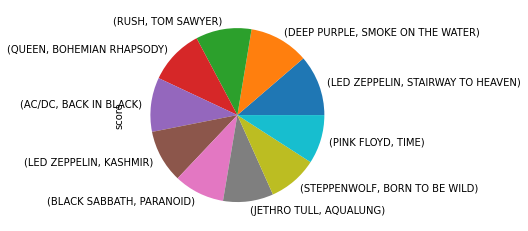

In [19]:
df_rank.groupby(['artist', 'music'])['score'].agg('sum').sort_values(ascending=False)[:10].plot(kind='pie');

In [18]:
df_rank.groupby(['artist'])['score'].agg('sum').sort_values(ascending=False)[:10]

artist
BEATLES          117102
LED ZEPPELIN      99414
QUEEN             88039
PINK FLOYD        73595
AC/DC             71332
DEEP PURPLE       61047
BLACK SABBATH     59875
RUSH              57436
AEROSMITH         55429
KISS              50741
Name: score, dtype: int64